In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [4]:
#Separate and arrange train and test dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()
#In tuple,We call train and test dataset from mnist dataset.

In [5]:
#For CNN Preprocessing methods
x_train.shape
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train=x_train.reshape(60000, 28, 28 ,1) # 1 for flatten the dataset
x_test=x_test.reshape(10000, 28, 28 ,1)
x_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [8]:
#Chaneg the datatype
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

#Normalisation
x_train /= 255
x_test /= 255

In [9]:
#Base model creation
from tensorflow.keras.layers import Dense,Activation,MaxPooling2D,Flatten,Conv2D,Dropout
from tensorflow.keras.models import Sequential

#convolution layer
model = Sequential()
model.add(Conv2D(78,kernel_size=(3,3),strides=1,activation= "relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#Neural network
model.add(Dense(260,activation=tf.nn.relu))
model.add(Dropout( 0.2))
model.add(Dense(10,activation=tf.nn.softmax))


C:\Users\nravi378\AppData\Local\anaconda3\envs\art\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
#Brain Creation
model.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.9172 - loss: 0.2697 - val_accuracy: 0.9824 - val_loss: 0.0525
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9848 - loss: 0.0500 - val_accuracy: 0.9854 - val_loss: 0.0440
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.9907 - loss: 0.0290 - val_accuracy: 0.9859 - val_loss: 0.0445


In [25]:
#Predicted value for clf report
y_predict = model.predict(x_test) 



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [26]:
y_predict[0] # Need to change original value

array([9.9992938e-09, 2.1177874e-08, 8.0494294e-07, 7.8714011e-06,
       1.8263041e-09, 6.2403038e-10, 3.0407255e-13, 9.9999058e-01,
       9.4691856e-08, 5.9686306e-07], dtype=float32)

In [41]:
# Using argmax to convert the original data
import numpy as np
y_predicts= np.argmax(y_predict,axis=1)

#We didn't change the Y_test value,directly go with Y_test for clf report


In [45]:
from sklearn.metrics import confusion_matrix,classification_report

con_mat = confusion_matrix(y_test,y_predicts)
con_mat

array([[ 972,    1,    2,    1,    0,    0,    4,    0,    0,    0],
       [   0, 1125,    3,    1,    0,    0,    4,    1,    1,    0],
       [   0,    0, 1022,    1,    1,    0,    0,    8,    0,    0],
       [   0,    0,    1,  997,    0,    4,    0,    4,    2,    2],
       [   0,    0,    1,    0,  976,    0,    1,    0,    0,    4],
       [   1,    0,    1,    5,    0,  875,    7,    1,    0,    2],
       [   0,    1,    1,    1,    1,    1,  953,    0,    0,    0],
       [   0,    1,    8,    0,    0,    0,    0, 1012,    1,    6],
       [   5,    0,    4,    6,    3,    4,    9,    3,  934,    6],
       [   0,    0,    0,    3,    7,    3,    1,    1,    1,  993]],
      dtype=int64)

<Axes: >

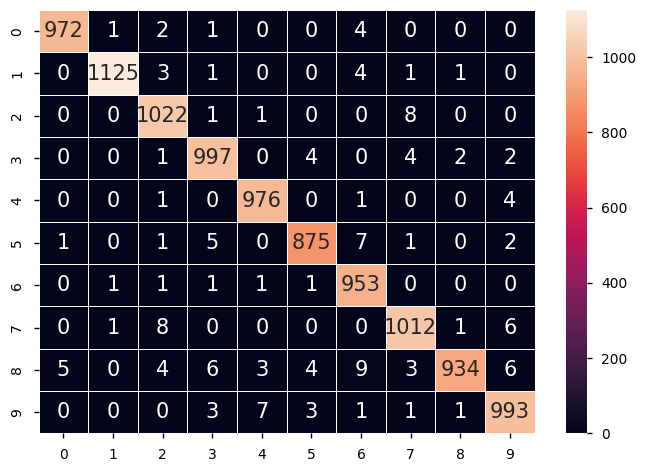

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt="d")

In [68]:
clf = classification_report(y_test,y_predicts)
print(clf)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.97      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.96      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [75]:
#To calculate the single value.
y_predict = model.predict(x_test[[23]]) 
#The double bracket x_test[[23]] is used to ensure that the indexing of the test data returns a 2D array instead of a 1D array. This way, the input to the predict method maintains the expected shape for a single instance in a batch format.

y_predicts = np.argmax(y_predict,axis=1)
y_predicts[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


5

Predicted value is 5


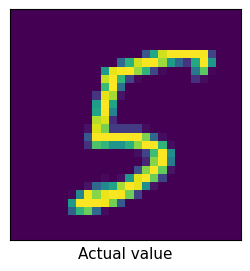

In [97]:
plt.figure(figsize=(3,3))
plt.imshow(x_test[23])
plt.xticks([])
plt.yticks([])
plt.xlabel("Actual value")
print("Predicted value is",y_predicts[0])